In [2]:
import os
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy

import math
import ephem
from datetime import datetime, time, timedelta
from math import pi, cos, sin

In [3]:
save_figs_dir = 'figs/flux_figs/'
model_dirs = ['hfss_mon_historical','hfls_mon_historical','lwp_mon_historical','clt_mon_historical']
path_to_cmip_dirs = '/export/data1/cchristo/cmip6_clouds/'
path_to_cmip_files = path_to_cmip_dirs + 'hfss_mon_historical/'

In [212]:
# os.listdir(path_to_cmip_dirs + 'clt_mon_historical')

In [4]:
to_load = []
for rel_path in model_dirs:
    files_ = os.listdir(path_to_cmip_dirs + rel_path)
    to_load += [rel_path + '/' + file_i for file_i in files_ if ('CESM2' in file_i) &
                ('r1i1p1f1' in file_i) & ('WACCM' in file_i)
                & ('201412' in file_i) & ('Amon' in file_i or 'AERmon' in file_i)]
to_load_full_paths = [path_to_cmip_dirs + file_i for file_i in to_load]

In [214]:
to_load_full_paths

['/export/data1/cchristo/cmip6_clouds/hfss_mon_historical/hfss_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc',
 '/export/data1/cchristo/cmip6_clouds/hfls_mon_historical/hfls_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc',
 '/export/data1/cchristo/cmip6_clouds/lwp_mon_historical/lwp_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc',
 '/export/data1/cchristo/cmip6_clouds/clt_mon_historical/clt_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc']

In [21]:
# os.listdir(path_to_cmip_dirs + rel_path)[0]

In [5]:
# ds = xr.open_dataset(path_to_cmip_files + 'hfss_ImonAnt_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc')
ds = xr.open_mfdataset(to_load_full_paths,  combine='by_coords')
ds = ds.sel(time=slice('1980','2010'))

/home/cchristo/.conda/envs/py36/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'hfss' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/home/cchristo/.conda/envs/py36/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'hfls' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/home/cchristo/.conda/envs/py36/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'lwp' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/home/cchristo/.conda/envs/py36/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'clt' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


In [10]:
ds['lwp'].shape
# ds['lwp']

(372, 192, 288)

In [30]:
rr = [ds['lwp']['time'][ii].item().strftime() for ii in range(len(ds['lwp']['time']))]

In [44]:
# rr
# ds['lwp']['time.year']


In [217]:
# ds
ds['buo_flux'] = ds['hfss'] + 0.07*ds['hfls']

In [218]:
buo_flux = ds['buo_flux'].values
lwp = ds['lwp'].values
clt = ds['clt'].values
ss_flux = ds['hfss'].values
lh_flux = ds['hfls'].values

In [220]:
buo_flux_flat = buo_flux.flatten()
lwp_flat = lwp.flatten()
clt_flat = clt.flatten()
ss_flux_flat = ss_flux.flatten()
lh_flux_flat = lh_flux.flatten()

# rand_inds = np.arange(len(lwp_flat))
# np.random.shuffle(rand_inds)
# rand_inds = rand_inds[:int(1e7)]

# buo_flux_flat = buo_flux_flat[rand_inds]
# lwp_flat = lwp_flat[rand_inds]
# ss_flux_flat = ss_flux_flat[rand_inds]
# lh_flux_flat = lh_flux_lat[rand_inds]

# # remove cases w/ 0 LWP
# buo_flux_flat = np.where(lwp_flat >0, buo_flux_flat, np.nan)
# ss_flux_flat = np.where(lwp_flat >0, ss_flux_flat, np.nan)
# lh_flux_flat = np.where(lwp_flat >0, lh_flux_flat, np.nan)
# lwp_flat = np.where(lwp_flat >0, lwp_flat, np.nan)

# lwp_flat = lwp_flat[~np.isnan(lwp_flat)]
# buo_flux_flat = buo_flux_flat[~np.isnan(buo_flux_flat)]
# ss_flux_flat = ss_flux_flat[~np.isnan(ss_flux_flat)]
# lh_flux_flat = lh_flux_flat[~np.isnan(lh_flux_flat)]


# remove cases w/ 0 CLT
buo_flux_flat = np.where(clt_flat  >0, buo_flux_flat, np.nan)
ss_flux_flat = np.where(clt_flat  >0, ss_flux_flat, np.nan)
lh_flux_flat = np.where(clt_flat  >0, lh_flux_flat, np.nan)
clt_flat  = np.where(clt_flat  >0, clt_flat , np.nan)

clt_flat  = lwp_flat[~np.isnan(clt_flat)]
buo_flux_flat = buo_flux_flat[~np.isnan(buo_flux_flat)]
ss_flux_flat = ss_flux_flat[~np.isnan(ss_flux_flat)]
lh_flux_flat = lh_flux_flat[~np.isnan(lh_flux_flat)]




# positive flux only cases 

# buo_flux_flat = np.where(lwp_flat >0, buo_flux_flat, np.nan)
# ss_flux_flat = np.where(ss_flux_flat >0, ss_flux_flat, np.nan)
# lh_flux_flat = np.where(lwp_flat >0, lh_flux_flat, np.nan)
# lwp_flat = np.where(lwp_flat >0, lwp_flat, np.nan)

# lwp_flat = lwp_flat[~np.isnan(lwp_flat)]
# buo_flux_flat = buo_flux_flat[~np.isnan(buo_flux_flat)]
# ss_flux_flat = ss_flux_flat[~np.isnan(ss_flux_flat)]
# lh_flux_flat = lh_flux_flat[~np.isnan(lh_flux_flat)]

In [55]:
# buo_flux_flat.shape
# 1e6
# plt.hist(lwp_flat, bins = 100)

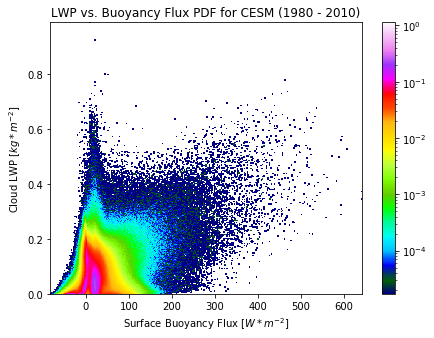

In [223]:
plt.figure(figsize = (7,5))
plt.hist2d(buo_flux_flat,clt_flat, bins = 500, density = True, 
           cmap = plt.get_cmap('gist_ncar'), norm=matplotlib.colors.LogNorm())
plt.title('LWP vs. Buoyancy Flux PDF for CESM (1980 - 2010)')
plt.xlabel(r'Surface Buoyancy Flux $[W*m^{-2}]$')
plt.ylabel(r'Cloud LWP $[kg*m^{-2}]$')
# plt.axis([-100, 400, 0, 0.6])
plt.colorbar()
# plt.show()
plt.savefig(save_figs_dir + 'cesm_lwp_vs_buoyancy.png', dpi = 250)

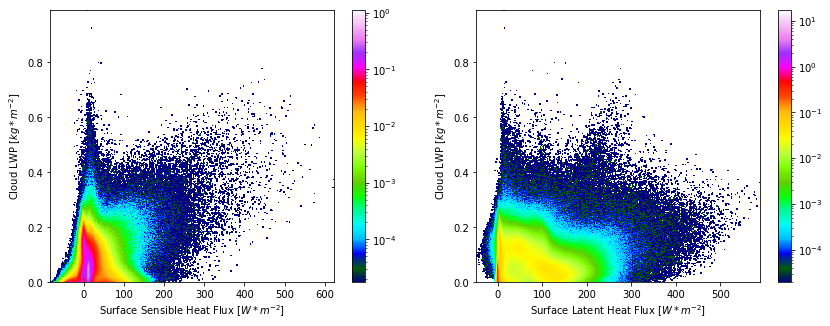

In [130]:

plt.figure(figsize = (14,5))
plt.subplot(121)
plt.hist2d(ss_flux_flat,lwp_flat, bins = 500, density = True, 
           cmap = plt.get_cmap('gist_ncar'), norm=matplotlib.colors.LogNorm())
plt.xlabel(r'Surface Sensible Heat Flux $[W*m^{-2}]$')
plt.ylabel(r'Cloud LWP $[kg*m^{-2}]$')
plt.colorbar()
# plt.grid()


plt.subplot(122)
plt.hist2d(lh_flux_flat,lwp_flat, bins = 500, density = True, 
           cmap = plt.get_cmap('gist_ncar'), norm=matplotlib.colors.LogNorm())
plt.xlabel(r'Surface Latent Heat Flux $[W*m^{-2}]$')
plt.ylabel(r'Cloud LWP $[kg*m^{-2}]$')
plt.colorbar()
# plt.grid()
# plt.show()

plt.savefig(save_figs_dir + 'cesm_lwp_vs_each_flux.png', dpi = 250)

In [194]:
# compute coercoef by gridpoint 
# buo_flux = ds['buo_flux'].values
# lwp = ds['lwp'].values
# ss_flux = ds['hfss'].values
# lh_flux = ds['hfls'].values

coer_coef_xy = np.zeros(lwp.shape[-2:])
y_int_xy = np.zeros(lwp.shape[-2:])
p_value_xy = np.zeros(lwp.shape[-2:])
for lat_ii in tqdm(range(lwp.shape[1])):
    for lon_ii in range(lwp.shape[2]):
        slope, intercept, r_value, p_value, std_err = \
            scipy.stats.linregress(buo_flux[:,lat_ii,lon_ii], lwp[:,lat_ii,lon_ii])
        coer_coef_xy[lat_ii, lon_ii] = r_value
        y_int_xy[lat_ii, lon_ii] = intercept
        p_value_xy[lat_ii, lon_ii] = p_value


100%|██████████| 192/192 [00:18<00:00, 10.46it/s]


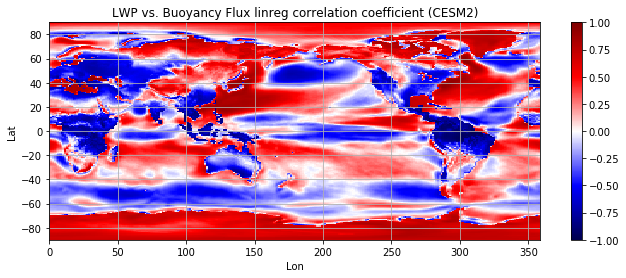

In [205]:
# lwp.shape
plt.figure(figsize = (11,4))
plt.title("LWP vs. Buoyancy Flux linreg correlation coefficient (CESM2)")
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.pcolormesh(ds['lon'].values, ds['lat'].values, coer_coef_xy, 
               cmap = plt.get_cmap('seismic'), 
               vmin = -1,
               vmax = 1,
                )
plt.grid()
plt.colorbar()
plt.savefig(save_figs_dir + 'cesm_lwp_buoyancy_flux_cc.png', dpi = 250)

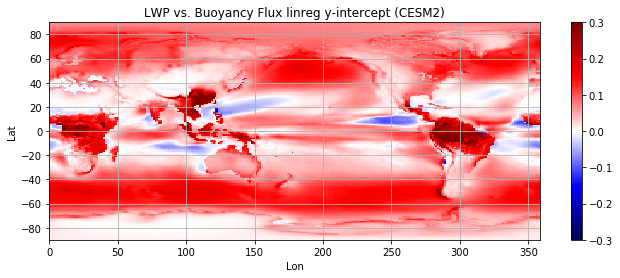

In [206]:
plt.figure(figsize = (11,4))
plt.title("LWP vs. Buoyancy Flux linreg y-intercept (CESM2)")
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.pcolormesh(ds['lon'].values, ds['lat'].values, y_int_xy, 
               cmap = plt.get_cmap('seismic'),
              vmin = -0.3,
              vmax = 0.3)
plt.grid()
plt.colorbar()
plt.savefig(save_figs_dir + 'cesm_lwp_buoyancy_flux_y_intercept.png', dpi = 250)

In [202]:
# plt.figure(figsize = (11,4))
# plt.title("LWP vs. Buoyancy Flux linreg y-intercept (CESM2)")
# plt.xlabel("Lon")
# plt.ylabel("Lat")
# plt.pcolormesh(ds['lon'].values, ds['lat'].values, p_value_xy, 
#                cmap = plt.get_cmap('seismic'))
# plt.grid()
# plt.colorbar()

In [154]:
# plot mean fields 

buo_flux_mean = np.mean(buo_flux, axis = 0)
lwp_mean = np.mean(lwp, axis = 0)
ss_flux_mean = np.mean(ss_flux, axis = 0)
lh_flux_mean = np.mean(lh_flux, axis = 0)

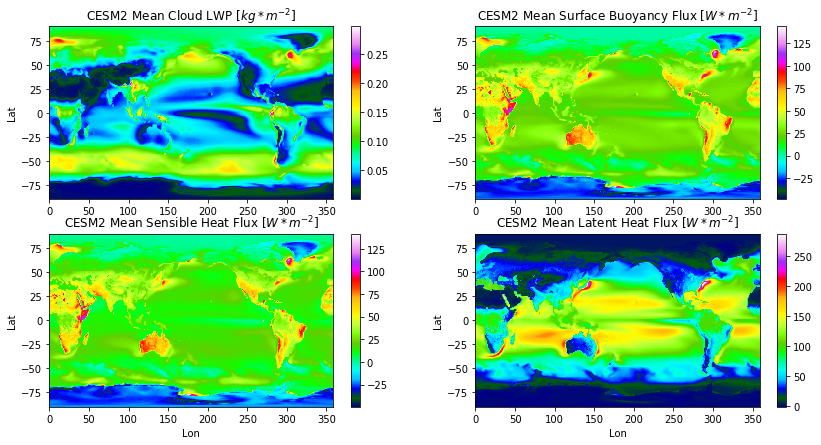

In [171]:
model_name_fig = 'CESM2 '

plt.figure(figsize = (14,7))
plt.subplot(221)
plt.title(model_name_fig + r'Mean Cloud LWP $[kg*m^{-2}]$')
plt.pcolormesh(ds['lon'].values, ds['lat'].values, lwp_mean, cmap = plt.get_cmap('gist_ncar'))
plt.colorbar()
# plt.xlabel("Lon")
plt.ylabel("Lat")

plt.subplot(222)
plt.title(model_name_fig + r'Mean Surface Buoyancy Flux $[W*m^{-2}]$')
plt.pcolormesh(ds['lon'].values, ds['lat'].values, buo_flux_mean, cmap = plt.get_cmap('gist_ncar'))
plt.colorbar()
# plt.xlabel("Lon")
plt.ylabel("Lat")

plt.subplot(223)
plt.title(model_name_fig + r'Mean Sensible Heat Flux $[W*m^{-2}]$')
plt.pcolormesh(ds['lon'].values, ds['lat'].values, ss_flux_mean, cmap = plt.get_cmap('gist_ncar'))
plt.colorbar()
plt.xlabel("Lon")
plt.ylabel("Lat")

plt.subplot(224)
plt.title(model_name_fig + r'Mean Latent Heat Flux $[W*m^{-2}]$')
plt.pcolormesh(ds['lon'].values, ds['lat'].values, lh_flux_mean, cmap = plt.get_cmap('gist_ncar'))
plt.colorbar()
plt.xlabel("Lon")
plt.ylabel("Lat")

plt.savefig(save_figs_dir + 'cesm_means.png', dpi = 300)

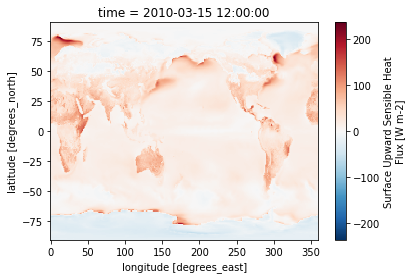

In [39]:
ds['hfss'].isel(time = -10).plot.imshow()

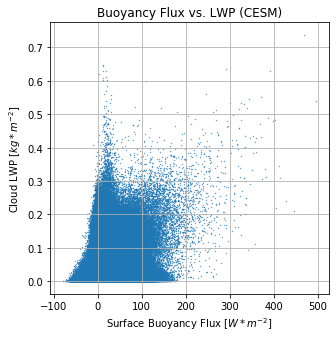

In [57]:
# plt.figure(figsize = (5,5))
# plt.scatter(buo_flux_flat,lwp_flat, s = 0.1)
# plt.title('Buoyancy Flux vs. LWP (CESM)')
# plt.xlabel(r'Surface Buoyancy Flux $[W*m^{-2}]$')
# plt.ylabel(r'Cloud LWP $[kg*m^{-2}]$')
# plt.grid()
# plt.show()

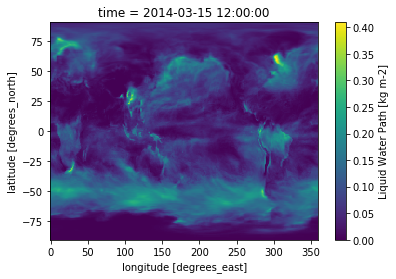

In [49]:
ds['lwp'].isel(time = -10).plot.imshow()